# **Global Youtube Statistics (Cleaning + EDA + Visualization)**

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **Data Collection**

In [2]:
# Load the data
df = pd.read_csv('youtube_statistics.csv', encoding = 'windows-1254')

## **Understand the Data**

In [3]:
# Preview the head of the data
df.head()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


In [4]:
# Preview the tail of the data
df.tail()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
990,991,Natan por Aï¿,12300000,9.029610e+09,Sports,Natan por Aï¿,1200,Brazil,BR,Entertainment,...,700000.0,2017.0,Feb,12.0,51.3,2.125594e+08,12.08,183241641.0,-14.235004,-51.925280
991,992,Free Fire India Official,12300000,1.674410e+09,People & Blogs,Free Fire India Official,1500,India,IN,Games,...,300000.0,2018.0,Sep,14.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
992,993,Panda,12300000,2.214684e+09,NaN,HybridPanda,2452,United Kingdom,GB,Games,...,1000.0,2006.0,Sep,11.0,60.0,6.683440e+07,3.85,55908316.0,55.378051,-3.435973
993,994,RobTopGames,12300000,3.741235e+08,Gaming,RobTopGames,39,Sweden,SE,Games,...,100000.0,2012.0,May,9.0,67.0,1.028545e+07,6.48,9021165.0,60.128161,18.643501
994,995,Make Joke Of,12300000,2.129774e+09,Comedy,Make Joke Of,62,India,IN,Comedy,...,100000.0,2017.0,Aug,1.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


In [5]:
# Check the shape of the data
df.shape

(995, 28)

In [6]:
# Check the info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     995 non-null    int64  
 1   Youtuber                                 995 non-null    object 
 2   subscribers                              995 non-null    int64  
 3   video views                              995 non-null    float64
 4   category                                 949 non-null    object 
 5   Title                                    995 non-null    object 
 6   uploads                                  995 non-null    int64  
 7   Country                                  873 non-null    object 
 8   Abbreviation                             873 non-null    object 
 9   channel_type                             965 non-null    object 
 10  video_views_rank                         994 non-n

In [7]:
# Summary of the data
df.describe()

,rank,subscribers,video views,uploads,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,...,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
count,995.00000,9.950000e+02,9.950000e+02,995.000000,9.940000e+02,879.000000,962.000000,9.390000e+02,995.000000,9.950000e+02,...,9.950000e+02,6.580000e+02,990.000000,990.000000,872.000000,8.720000e+02,872.000000,8.720000e+02,872.000000,872.000000
mean,498.00000,2.298241e+07,1.103954e+10,9187.125628,5.542489e+05,386.053470,745.719335,1.756103e+08,36886.148281,5.898078e+05,...,7.081814e+06,3.490791e+05,2012.630303,15.746465,63.627752,4.303873e+08,9.279278,2.242150e+08,26.632783,-14.128146
std,287.37606,1.752611e+07,1.411084e+10,34151.352254,1.362782e+06,1232.244746,1944.386561,4.163782e+08,71858.724092,1.148622e+06,...,1.379704e+07,6.143554e+05,4.512503,8.777520,26.106893,4.727947e+08,4.888354,1.546874e+08,20.560533,84.760809
min,1.00000,1.230000e+07,0.000000e+00,0.000000,1.000000e+00,1.000000,1.000000,1.000000e+00,0.000000,0.000000e+00,...,0.000000e+00,1.000000e+00,1970.000000,1.000000,7.600000,2.025060e+05,0.750000,3.558800e+04,-38.416097,-172.104629
25%,249.50000,1.450000e+07,4.288145e+09,194.500000,3.230000e+02,11.000000,27.000000,2.013750e+07,2700.000000,4.350000e+04,...,5.217500e+05,1.000000e+05,2009.000000,8.000000,36.300000,8.335541e+07,5.270000,5.590832e+07,20.593684,-95.712891
50%,498.00000,1.770000e+07,7.760820e+09,729.000000,9.155000e+02,51.000000,65.500000,6.408500e+07,13300.000000,2.127000e+05,...,2.600000e+06,2.000000e+05,2013.000000,16.000000,68.000000,3.282395e+08,9.365000,2.706630e+08,37.090240,-51.925280
75%,746.50000,2.460000e+07,1.355470e+10,2667.500000,3.584500e+03,123.000000,139.750000,1.688265e+08,37900.000000,6.068000e+05,...,7.300000e+06,4.000000e+05,2016.000000,23.000000,88.200000,3.282395e+08,14.700000,2.706630e+08,37.090240,78.962880
max,995.00000,2.450000e+08,2.280000e+11,301308.000000,4.057944e+06,7741.000000,7741.000000,6.589000e+09,850900.000000,1.360000e+07,...,1.634000e+08,8.000000e+06,2022.000000,31.000000,113.100000,1.397715e+09,14.720000,8.429340e+08,61.924110,138.252924


In [8]:
# Check for duplicates
df.duplicated().sum()

0

In [9]:
# Check for missing values
df.isnull().sum()

,0
rank,0
Youtuber,0
subscribers,0
video views,0
category,46
Title,0
uploads,0
Country,122
Abbreviation,122
channel_type,30


## **Data Cleaning**

In [10]:
# Drop the last six columns
df.drop(['Gross tertiary education enrollment (%)', 'Population', 'Unemployment rate', 'Urban_population', 'Latitude', 'Longitude'], axis = 1, inplace = True)

In [11]:
# Fill missing values in categorical columns with 'N.A.'
df[['Country','Abbreviation','channel_type','category']] = df[['Country','Abbreviation','channel_type','category']].fillna('N.A.')

In [12]:
# Fill missing values in numerical columns with the mode
df[['subscribers_for_last_30_days']] = df[['subscribers_for_last_30_days']].fillna(df['subscribers_for_last_30_days'].mode()[0])
df[['video_views_for_the_last_30_days']] = df[['video_views_for_the_last_30_days']].fillna(df['video_views_for_the_last_30_days'].mode()[0])
df[['channel_type_rank']] = df[['channel_type_rank']].fillna(df['channel_type_rank'].mode()[0])
df[['country_rank']] = df[['country_rank']].fillna(df['country_rank'].mode()[0])

In [13]:
# Check for missing values
df.isnull().sum()

,0
rank,0
Youtuber,0
subscribers,0
video views,0
category,0
Title,0
uploads,0
Country,0
Abbreviation,0
channel_type,0


In [14]:
# Drop the remaining missing values
df.dropna(inplace = True)

In [15]:
# Change created_date column type to date type
df.created_date = pd.to_datetime(df.created_date)

In [16]:
# Check our data shape
df.shape

(990, 22)

In [17]:
# Check our data info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 990 entries, 0 to 994
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   rank                              990 non-null    int64         
 1   Youtuber                          990 non-null    object        
 2   subscribers                       990 non-null    int64         
 3   video views                       990 non-null    float64       
 4   category                          990 non-null    object        
 5   Title                             990 non-null    object        
 6   uploads                           990 non-null    int64         
 7   Country                           990 non-null    object        
 8   Abbreviation                      990 non-null    object        
 9   channel_type                      990 non-null    object        
 10  video_views_rank                  990 non-null    float

## **EDA**

In [18]:
# Create a copy for our data
df_clean = df.copy()

### **Feature Engineering**

In [19]:
# Creating a list of all countries in their different continents.

Africa = ["Algeria","Angola","Benin","Botswana","Burkina Faso","Burundi","Cabo Verde","Cameroon","Central African Republic",
          "Chad","Comoros","Congo, Dem. Rep", "Congo, Rep.","Cote d'Ivoire","Djibouti","Egypt","Equatorial Guinea","Eritrea",
          "Eswatini (formerly Swaziland)","Ethiopia","Gabon","Gambia","Ghana","Guinea","Guinea-Bissau","Kenya", "Lesotho",
          "Liberia",'Libya',"Madagascar","Malawi","Mali","Mauritania","Mauritius","Morocco","Mozambique","Namibia",
          "Niger","Nigeria","Rwanda","Sao Tome and Principe","Senegal","Seychelles","Sierra Leone","Somalia","South Africa",
          "South Sudan","Sudan","Tanzania""Togo","Tunisia","Uganda","Zambia","Zimbabwe"]

Europe = ["Albania","Andorra", "Armenia","Austria","Azerbaijan","Belarus","Belgium","Bosnia and Herzegovina",
          "Bulgaria","Croatia","Cyprus","Czechia","Denmark","Estonia","Finland","France","Georgia","Germany",
          "Greece","Hungary","Iceland","Ireland","Italy","Kazakhstan","Kosovo","Latvia","Liechtenstein","Lithuania",
          "Luxembourg","Malta","Moldova","Monaco","Montenegro","Netherlands","Macedonia, FYR","Norway","Poland","Portugal",
          "Romania","Russia","San Marino","Serbia","Slovakia","Slovenia","Spain","Sweden","Switzerland","Turkey",
          "Ukraine","United Kingdom","Vatican City"]

Asia = ["Afghanistan","Armenia","Azerbaijan","Bahrain","Bangladesh", "Bhutan","Brunei","Cambodia","China","Cyprus",
        "Georgia","India","Indonesia","Iran","Iraq","Israel","Japan","Jordan","Kazakhstan","Kuwait","Kyrgyzstan","Laos",
        "Lebanon","Malaysia","Maldives","Mongolia","Myanmar","Nepal","North Korea","Oman","Pakistan","Palestine","Philippines",
        "Qatar","Russia","Saudi Arabia","Singapore","South Korea","Sri Lanka","Syria","Taiwan","Tajikistan","Thailand",
        "Timor-Leste","Turkey","Turkmenistan","United Arab Emirates","Uzbekistan","Vietnam","Yemen"]

North_America = ["Antigua and Barbuda","Bahamas","Barbados","Belize","Canada","Costa Rica","Cuba","Dominica",
                 "Dominican Republic","El Salvador","Grenada","Guatemala","Haiti","Honduras","Jamaica","Mexico",
                 "Nicaragua","Panama","Saint Vincent and the Grenadines","United States"]

South_America = ["Argentina","Bolivia","Brazil","Chile","Colombia","Ecuador","Guyana","Paraguay","Peru","Suriname",
                 "Uruguay","Venezuela"]

Australia_and_Oceania = ["Australia","Fiji","Kiribati","Marshall Islands","Micronesia","Nauru","New Zealand","Palau",
                       "Papua New Guinea","Samoa","Solomon Islands","Tonga","Tuvalu","Vanuatu"]

In [20]:
# Create a function to fill the continent column with the respective continent of each country
def result(Country):
  if Country in Africa:
    return 'Africa'
  elif Country in Europe:
    return 'Europe'
  elif Country in Asia:
    return 'Asia'
  elif Country in North_America:
    return 'North America'
  elif Country in South_America:
    return 'South America'
  elif Country in Australia_and_Oceania:
    return 'Australia and Oceania'
  else:
    return 'N.A.'

# Apply the function into the df_clean
df_clean['continent'] = df_clean['Country'].apply(result)

In [21]:
df_clean

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_month,created_date,continent
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2.258000e+09,564600.0,9000000.00,6800000.00,1.084000e+08,2000000.0,2006.0,Mar,1970-01-01 00:00:00.000000013,Asia
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,1.200000e+01,0.0,0.05,0.04,5.800000e-01,100000.0,2006.0,Mar,1970-01-01 00:00:00.000000005,North America
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,1.348000e+09,337000.0,5400000.00,4000000.00,6.470000e+07,8000000.0,2012.0,Feb,1970-01-01 00:00:00.000000020,North America
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1.975000e+09,493800.0,7900000.00,5900000.00,9.480000e+07,1000000.0,2006.0,Sep,1970-01-01 00:00:00.000000001,North America
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1.824000e+09,455900.0,7300000.00,5500000.00,8.750000e+07,1000000.0,2006.0,Sep,1970-01-01 00:00:00.000000020,Asia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,991,Natan por Aï¿,12300000,9.029610e+09,Sports,Natan por Aï¿,1200,Brazil,BR,Entertainment,...,5.525130e+08,138100.0,2200000.00,1700000.00,2.650000e+07,700000.0,2017.0,Feb,1970-01-01 00:00:00.000000012,South America
991,992,Free Fire India Official,12300000,1.674410e+09,People & Blogs,Free Fire India Official,1500,India,IN,Games,...,6.473500e+07,16200.0,258900.00,194200.00,3.100000e+06,300000.0,2018.0,Sep,1970-01-01 00:00:00.000000014,Asia
992,993,Panda,12300000,2.214684e+09,N.A.,HybridPanda,2452,United Kingdom,GB,Games,...,6.703500e+04,17.0,268.00,201.00,3.200000e+03,1000.0,2006.0,Sep,1970-01-01 00:00:00.000000011,Europe
993,994,RobTopGames,12300000,3.741235e+08,Gaming,RobTopGames,39,Sweden,SE,Games,...,3.871000e+06,968.0,15500.00,11600.00,1.858000e+05,100000.0,2012.0,May,1970-01-01 00:00:00.000000009,Europe


### **Univariate Analysis**

<Axes: xlabel='count', ylabel='category'>

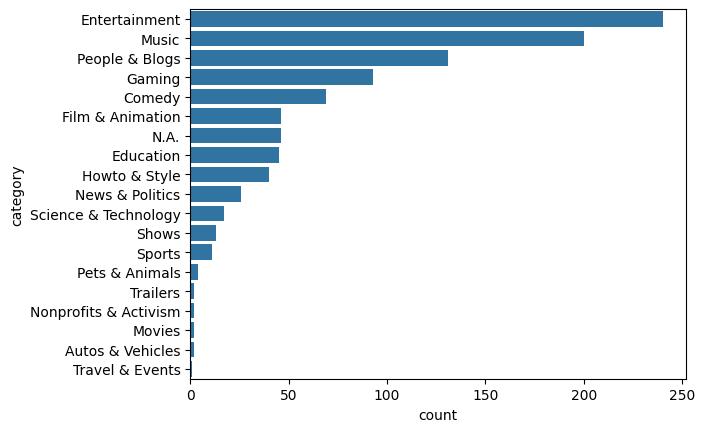

In [22]:
# What category has the most activity
category = df_clean.category.value_counts().index
sns.countplot(data = df_clean, y = 'category', order = category)

The Entertainment category has the highest amount of activity, followed by Music and People & Blogs. People seem to prefer light and less stressful videos on YouTube, as reflected in the top five categories, all of which are easy to consume.

<Axes: xlabel='count', ylabel='Country'>

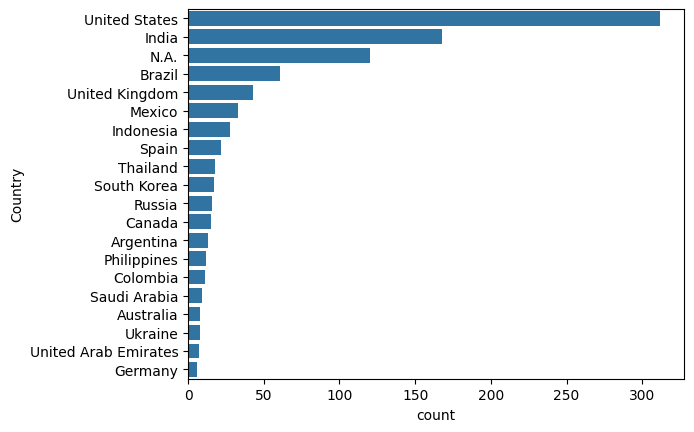

In [23]:
# Top 10 country with highest amount of YouTube activity
country = df_clean.Country.value_counts().index[:20]
sns.countplot(data = df_clean, y = 'Country', order = country)

United States and India are dominating activity on YouTube.

<Axes: xlabel='count', ylabel='continent'>

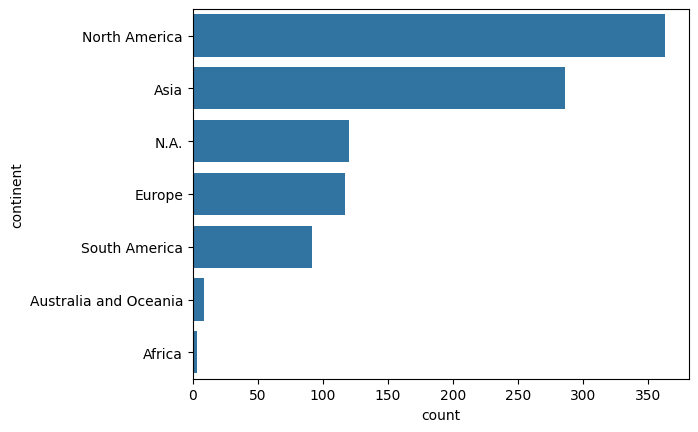

In [24]:
# Continent with the highest activity
continent = df_clean.continent.value_counts().index
sns.countplot(data = df_clean, y = 'continent', order = continent)

With the United States and India ranking first and second in activity, their respective regions, North America and Asia, also lead in overall activity.

In [25]:
# Loop to calculate measures of central tendency of multiple columns
columns = ['subscribers','video views','uploads','lowest_monthly_earnings',
           'highest_monthly_earnings','lowest_yearly_earnings','highest_yearly_earnings']

for column in columns:
  print('\n')
  print(f'The mean of {column} is {df_clean[column].mean()}')
  print(f'The median of {column} is {df_clean[column].median()}')
  print(f'The mode of {column} is {df_clean[column].mode()[0]}')



The mean of subscribers is 23007575.757575758
The median of subscribers is 17700000.0
The mode of subscribers is 12500000


The mean of video views is 11058725720.00101
The median of video views is 7761448300.0
The mode of video views is 0.0


The mean of uploads is 9233.525252525253
The median of uploads is 737.0
The mode of uploads is 0


The mean of lowest_monthly_earnings is 37072.441959595955
The median of lowest_monthly_earnings is 13450.0
The mode of lowest_monthly_earnings is 0.0


The mean of highest_monthly_earnings is 592786.6751010101
The median of highest_monthly_earnings is 215200.0
The mode of highest_monthly_earnings is 0.0


The mean of lowest_yearly_earnings is 444491.0157272728
The median of lowest_yearly_earnings is 161400.0
The mode of lowest_yearly_earnings is 0.0


The mean of highest_yearly_earnings is 7117580.65649495
The median of highest_yearly_earnings is 2600000.0
The mode of highest_yearly_earnings is 0.0


Top ten values for subscribers: 
{12500000: 22, 12400000: 20, 15000000: 17, 14500000: 16, 15100000: 16, 14400000: 15, 13100000: 14, 13300000: 14, 12700000: 13, 13200000: 12}


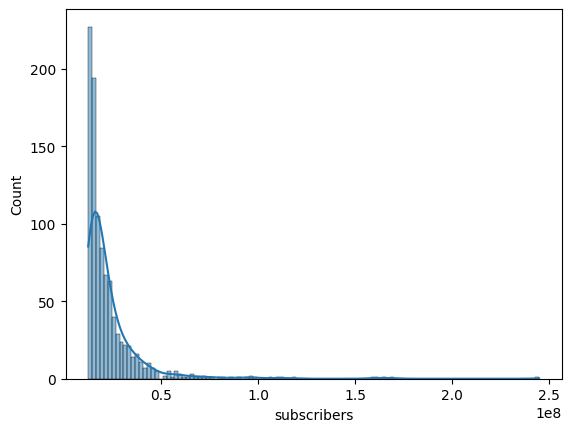

Top ten values for video views: 
{0.0: 8, 7151683497.0: 1, 8333387785.0: 1, 14198154095.0: 1, 6624168155.0: 1, 1777072487.0: 1, 1576633086.0: 1, 2143140898.0: 1, 2400037562.0: 1, 1760131384.0: 1}


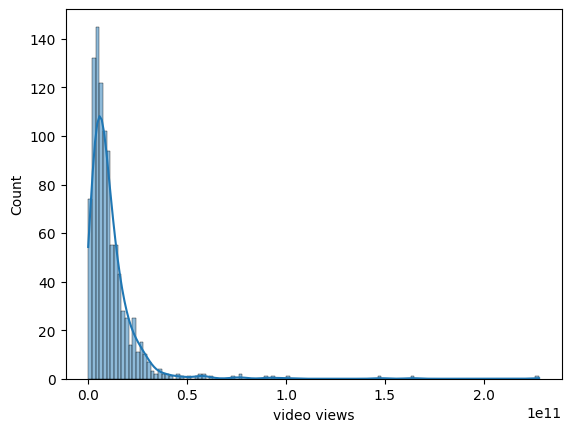

Top ten values for uploads: 
{0: 38, 1: 26, 2: 9, 3: 8, 6: 6, 982: 4, 287: 4, 8: 4, 744: 3, 975: 3}


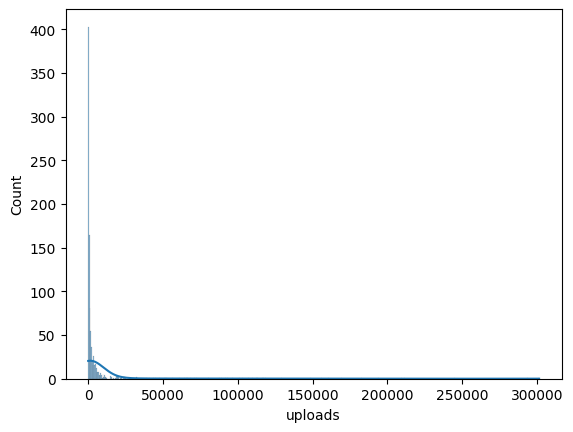

Top ten values for lowest_monthly_earnings: 
{0.0: 113, 0.01: 8, 0.02: 6, 2700.0: 6, 4300.0: 5, 6800.0: 5, 6000.0: 5, 11000.0: 5, 11500.0: 5, 6700.0: 5}


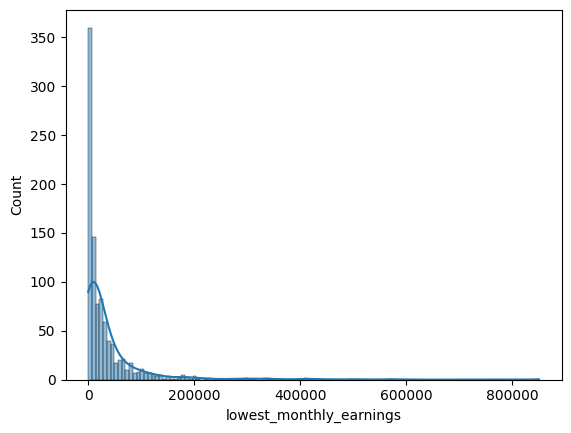

Top ten values for highest_monthly_earnings: 
{0.0: 84, 1100000.0: 18, 1300000.0: 16, 0.01: 12, 1600000.0: 9, 1200000.0: 9, 1700000.0: 8, 1400000.0: 7, 0.02: 7, 1500000.0: 7}


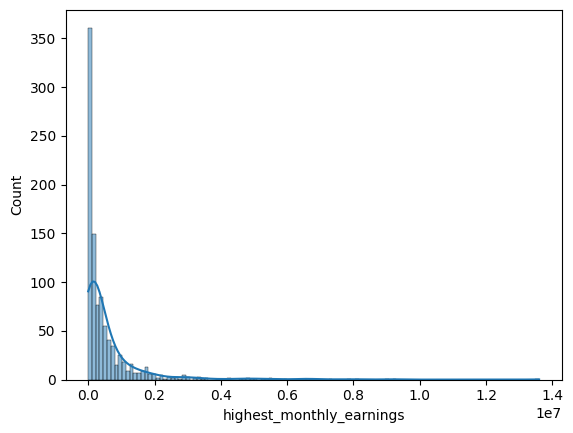

Top ten values for lowest_yearly_earnings: 
{0.0: 84, 0.01: 16, 1200000.0: 11, 1100000.0: 9, 1300000.0: 9, 1400000.0: 8, 1500000.0: 7, 1000000.0: 6, 0.02: 6, 1700000.0: 5}


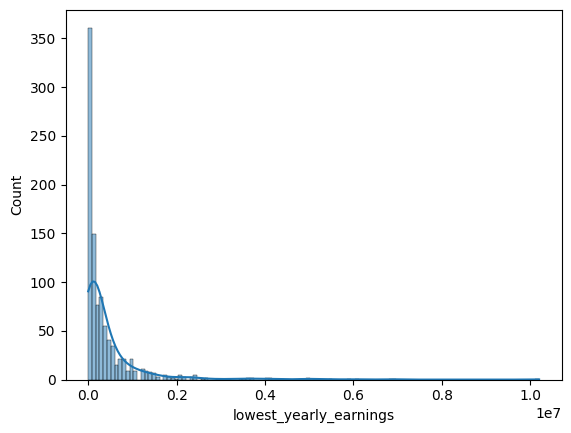

Top ten values for highest_yearly_earnings: 
{0.0: 74, 1300000.0: 21, 2100000.0: 17, 1400000.0: 15, 1200000.0: 13, 1100000.0: 12, 2300000.0: 12, 1700000.0: 12, 2200000.0: 12, 1500000.0: 12}


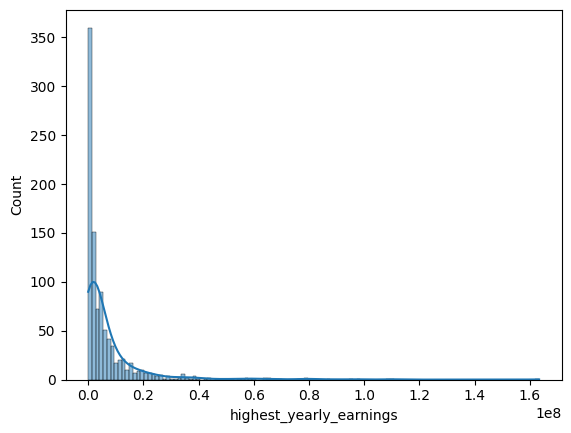

In [26]:
# Loop to visualize and give values of distribution of multiple columns

def uni_viz(dataframe, column):
    sns.histplot(dataframe[column], kde=True)

    values = dataframe[column].value_counts(ascending=False)
    print('Top ten values for {}: \n{}'.format(column, values.head(10).to_dict()))

    plt.show()
    return values.head(5)

for column in columns:
    uni_viz(df_clean, column)

The distribution of subscribers, video views, uploads, and earnings are all right-skewed. This means that most values are concentrated on the lower end, with a few extreme values pulling the tail to the right.

### **Bivariate Analysis**

Text(0, 0.5, 'Subscribers')

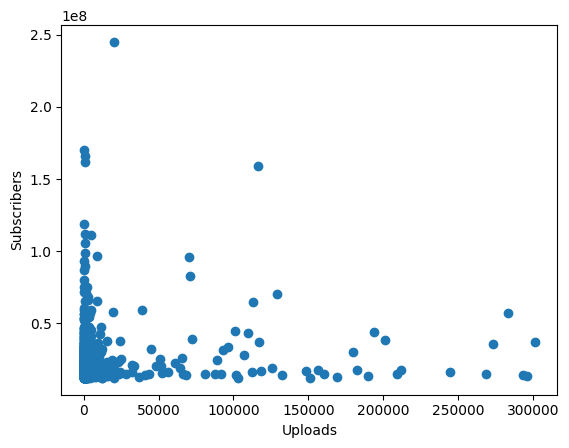

In [27]:
# Relationship between uploads and subs

plt.scatter(df_clean['uploads'], df_clean['subscribers'])
plt.xlabel('Uploads')
plt.ylabel('Subscribers')

There is no strong relationship between uploads and subscribers.

Text(0, 0.5, 'Highest Yearly Earnings')

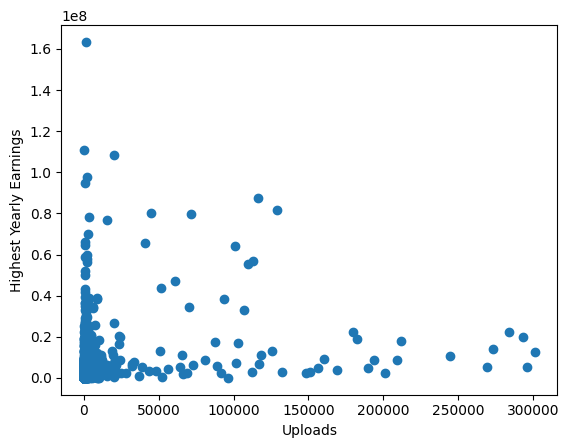

In [28]:
# Relationship between uploads and earnings

plt.scatter(df_clean['uploads'], df_clean['highest_yearly_earnings'])
plt.xlabel('Uploads')
plt.ylabel('Highest Yearly Earnings')

There is no strong relationship between upload counts and yearly earnings.

Text(0, 0.5, 'Highest Yearly Earnings')

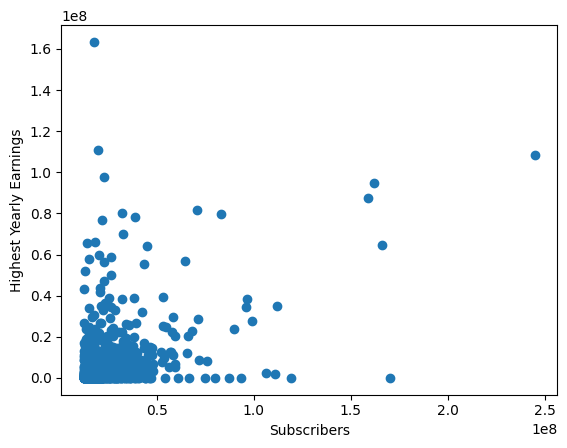

In [29]:
# Relationship between subscribers and earnings

plt.scatter(df_clean['subscribers'], df_clean['highest_yearly_earnings'])
plt.xlabel('Subscribers')
plt.ylabel('Highest Yearly Earnings')

There is no strong relationship between subscribers count and yearly earnings.

Text(0, 0.5, 'Video Views')

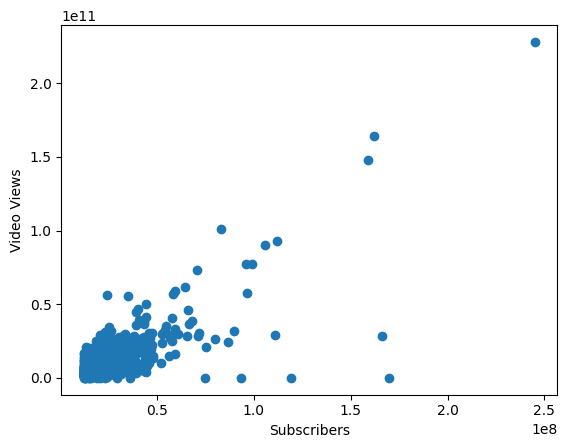

In [30]:
# Relationship between subscribers and video views

plt.scatter(df_clean['subscribers'], df_clean['video views'])
plt.xlabel('Subscribers')
plt.ylabel('Video Views')

There is a **strong** relationship between video views count and subscribers count

In [31]:
# Check correlation with a correlation matrix

matrix = df_clean.select_dtypes(include=['number']).corr()
matrix

,rank,subscribers,video views,uploads,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,created_year
rank,1.000000,-0.640626,-0.452957,-0.050894,-0.060357,0.017007,-0.030217,-0.178411,-0.248452,-0.248107,-0.248651,-0.248449,-0.183005,0.106025
subscribers,-0.640626,1.000000,0.750822,0.076788,0.060161,0.035609,0.026634,0.268171,0.388590,0.388228,0.388722,0.388585,0.272582,-0.141827
video views,-0.452957,0.750822,1.000000,0.165668,-0.060695,-0.058895,-0.046298,0.363841,0.552017,0.551376,0.552698,0.552012,0.202118,-0.127068
uploads,-0.050894,0.076788,0.165668,1.000000,-0.107660,-0.066580,-0.094710,0.106854,0.166365,0.166726,0.167189,0.166347,0.039857,-0.154904
video_views_rank,-0.060357,0.060161,-0.060695,-0.107660,1.000000,0.527393,0.820510,-0.110956,-0.206419,-0.206491,-0.206505,-0.206407,-0.157326,0.006671
country_rank,0.017007,0.035609,-0.058895,-0.066580,0.527393,1.000000,0.540855,-0.102146,-0.129406,-0.129437,-0.129460,-0.129399,-0.100830,-0.044689
channel_type_rank,-0.030217,0.026634,-0.046298,-0.094710,0.820510,0.540855,1.000000,-0.141969,-0.180224,-0.180282,-0.180305,-0.180212,-0.137325,-0.017262
video_views_for_the_last_30_days,-0.178411,0.268171,0.363841,0.106854,-0.110956,-0.102146,-0.141969,1.000000,0.683779,0.683739,0.683728,0.683779,0.481581,0.053729
lowest_monthly_earnings,-0.248452,0.388590,0.552017,0.166365,-0.206419,-0.129406,-0.180224,0.683779,1.000000,0.999955,0.999942,0.999998,0.695594,0.072316
highest_monthly_earnings,-0.248107,0.388228,0.551376,0.166726,-0.206491,-0.129437,-0.180282,0.683739,0.999955,1.000000,0.999884,0.999953,0.695925,0.072289


<Axes: >

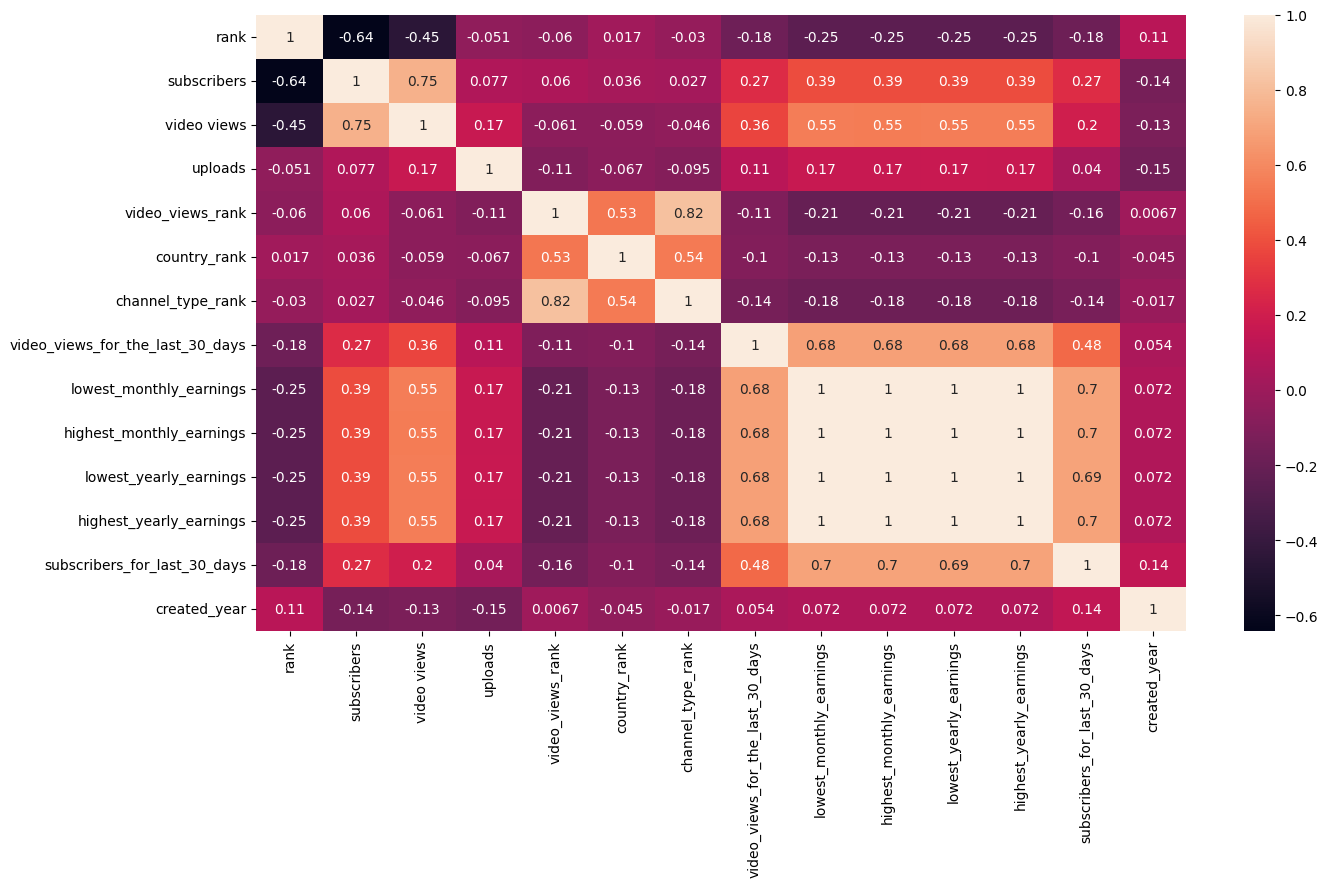

In [32]:
# Check correlation between variables using a heatmap

plt.figure(figsize=(15,8))
sns.heatmap(matrix, annot=True)

The strong correlation between video views and subsribers is proven by the correlation value of 0.75

### **Multivariate Analysis**

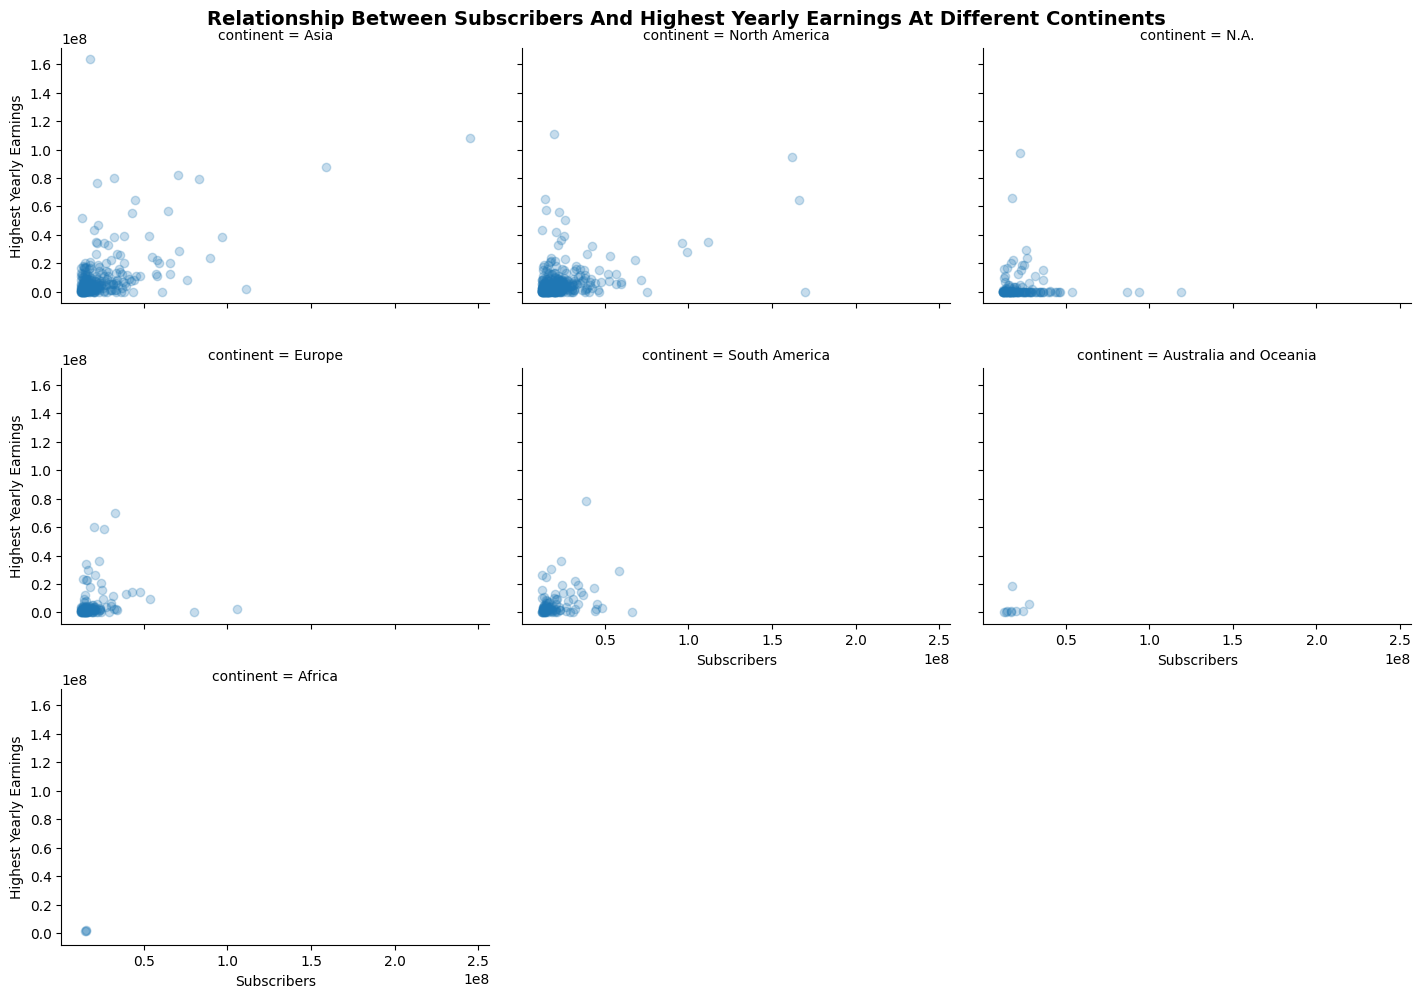

In [33]:
# Relationship between subscribers and earnings at different continents

g = sns.FacetGrid(data = df_clean, col='continent', col_wrap=3)
g.map(plt.scatter, 'subscribers', 'highest_yearly_earnings', alpha=0.25)
g.set_xlabels('Subscribers')
g.set_ylabels('Highest Yearly Earnings')
g.fig.set_size_inches(15,10)
plt.suptitle('Relationship between Subscribers and Highest Yearly Earnings at Different Continents'.title(), y=1, fontsize=14, weight='bold')
plt.show()

Asia become the continent with the strongest correlation between earnings and subscribers count